In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#Loading in the data
calendar_df = pd.read_csv('../Data/calendar.csv',parse_dates=['date'])
reviews_df = pd.read_csv('../Data/reviews.csv',parse_dates=['date'])

In [18]:
#I am only interested in the data that is available 
#Additionally, I only need the price and the date
cal_df = calendar_df[calendar_df['available'] == 't'].drop(['listing_id','available'],axis=1)

In [41]:
#Additionally, I need to price to be an float value
cal_df['price'] = cal_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [19]:
#I want to see the amount of listings both on a monthly basis and day of the week
#So I will add columns to help with this
#cal_df['month'] = pd.DatetimeIndex(cal_df['date']).month
cal_df['day_of_week'] = cal_df['date'].dt.day_name()
cal_df['Month'] = cal_df['date'].dt.strftime('%b')

<AxesSubplot:xlabel='day_of_week', ylabel='price'>

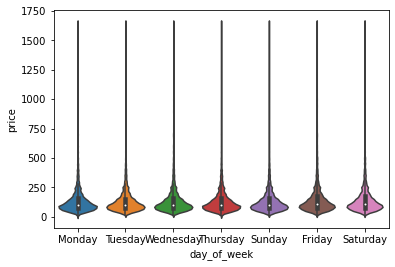

In [47]:
sns.violinplot(x=cal_df.day_of_week,y=cal_df.price)

In [43]:
cal_df.sample(5)

,date,price,day_of_week,Month
970507,2016-12-06,120.0,Tuesday,Dec
222861,2016-08-02,75.0,Tuesday,Aug
1326184,2016-05-22,85.0,Sunday,May
859720,2016-05-28,45.0,Saturday,May
4730,2016-12-19,245.0,Monday,Dec


In [33]:
#Starting with the month I want to see number of available openings and compare to the price
#month_availability = cal_df['Month'].value_counts()
month_availability = pd.DataFrame(cal_df["Month"].value_counts().values,
                                  index=cal_df["Month"].value_counts().index,
                                  columns=["available"])
month_availability.index.name = 'Month'

month_availability = month_availability.sort_values(by='Month')
#df = df.sort_values(by="Month")

In [34]:
month_availability

,available
Month,
Apr,76037
Aug,76347
Dec,87061
Feb,73321
Jan,64937
Jul,74222
Jun,77244
Mar,83938
May,79971


In [37]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ma = month_availability.reindex(new_order, axis=0)

In [38]:
ma

,available
Month,
Jan,64937
Feb,73321
Mar,83938
Apr,76037
May,79971
Jun,77244
Jul,74222
Aug,76347
Sep,77246


<AxesSubplot:ylabel='available'>

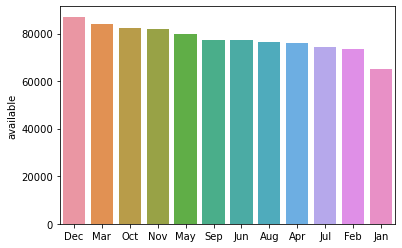

In [24]:
sns.barplot(x=month_availability.index,y=month_availability.available)

<AxesSubplot:xlabel='Month', ylabel='available'>

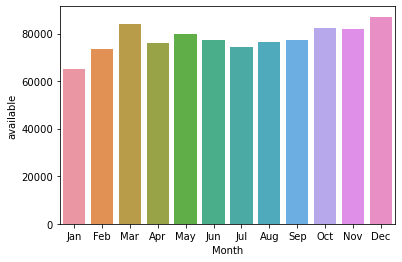

In [39]:
sns.barplot(x=ma.index,y=ma.available)

In [11]:
#Get the range in calender data set
#calendar_feq = pd.DataFrame(calendar["date"].value_counts().values,
#                           index=calendar["date"].value_counts().index,
#                           columns=["price_num"])
#calendar_feq

Dec    87061
Mar    83938
Oct    82438
Nov    81780
May    79971
Sep    77246
Jun    77244
Aug    76347
Apr    76037
Jul    74222
Feb    73321
Jan    64937
Name: Month, dtype: int64

In [5]:
cal_df.sample(5)

,date,price,day_of_week,Month
1126877,2016-05-05,$60.00,Thursday,May
744595,2016-12-29,$85.00,Thursday,Dec
830949,2016-07-31,$40.00,Sunday,Jul
151400,2016-10-20,$45.00,Thursday,Oct
1359823,2016-07-20,$95.00,Wednesday,Jul


In [ ]:
calendar_df.sample(5)

In [13]:
cal_df['Month_2'] = cal_df['date'].dt.strftime('%M')

In [16]:
cal_df.sample(5)

,date,price,day_of_week,Month,Month_2
865837,2016-03-01,$65.00,Tuesday,Mar,00
507804,2016-04-02,$265.00,Saturday,Apr,00
315080,2016-03-29,$58.00,Tuesday,Mar,00
858405,2016-10-20,$90.00,Thursday,Oct,00
382481,2016-11-25,$120.00,Friday,Nov,00
